## KNN Classifier


### Heart failure dataset
We will be starting with the Heart failure dataset with the original values

### Imports and data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../datasets/heart_failure_clinical_records_dataset.csv')

### Train and test split

In [2]:
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

Defining which distances to use and what K values to test

In [3]:
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
dist = ['manhattan', 'euclidean', 'chebyshev']

We will now test all our combinations to see the one that performs best and then try it on the test set

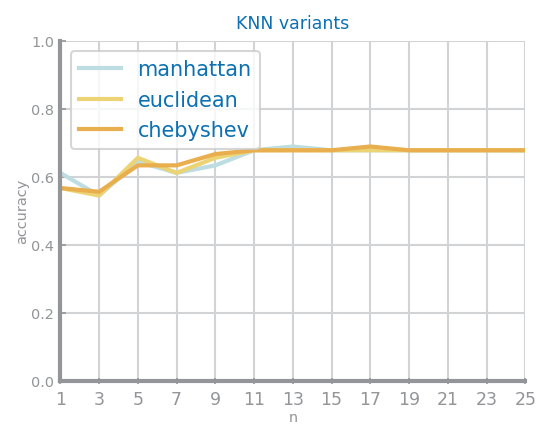

Best results with 13 neighbors and manhattan


In [4]:
values = {}
best = (0, '')
last_best = 0
for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prdY = knn.predict(tstX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
        if yvalues[-1] > last_best:
            best = (n, d)
            last_best = yvalues[-1]
    values[d] = yvalues

plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

An acc of 0.69%


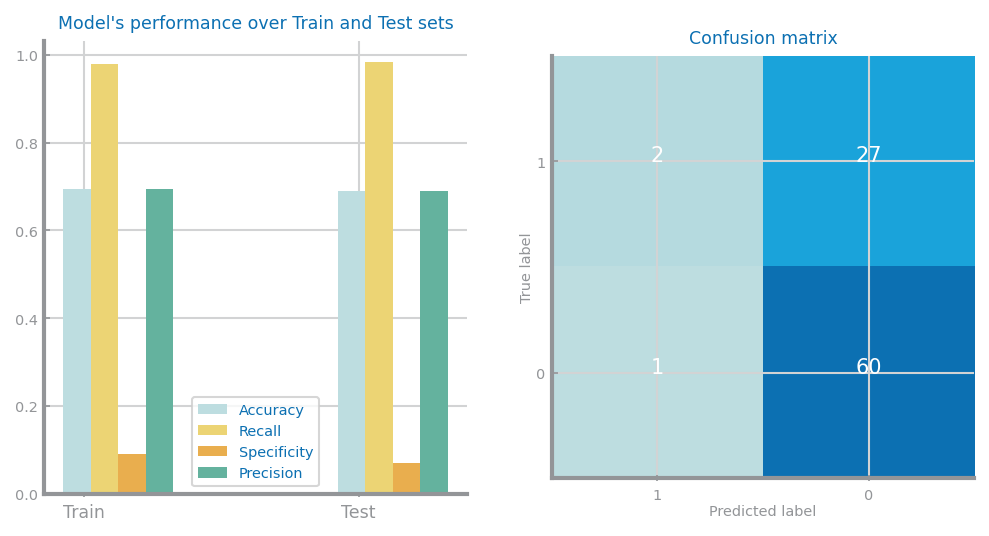

In [5]:
clf = knn = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)
print("An acc of {:.2f}%".format(metrics.accuracy_score(tstY, prd_tst)))

We can see that to be honest, our model is terrible. Is basically predict every point as a 0 which of course is not good.
Lets see if we ca achieve better result with Standardized or Normalized data.

### Heart failure dataset (Standardized)
We will now test the Heart failure dataset standardized values

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../datasets/heart_failure_clinical_records_standardized.csv')

In [7]:
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels = pd.unique(y)

In [8]:
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

We will of course test the same Ks and distances

In [9]:
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
dist = ['manhattan', 'euclidean', 'chebyshev']

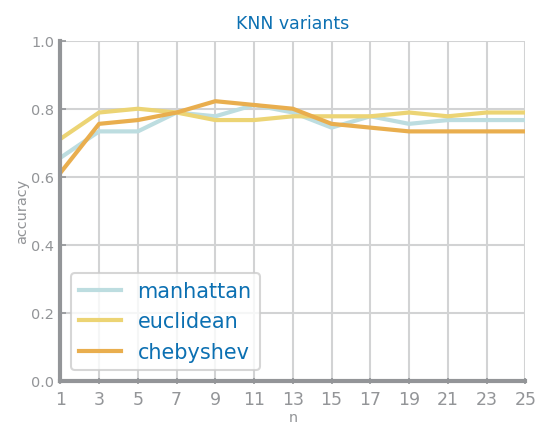

Best results with 9 neighbors and chebyshev


In [10]:
values = {}
best = (0, '')
last_best = 0
for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prdY = knn.predict(tstX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
        if yvalues[-1] > last_best:
            best = (n, d)
            last_best = yvalues[-1]
    values[d] = yvalues

plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

An acc of 0.82%


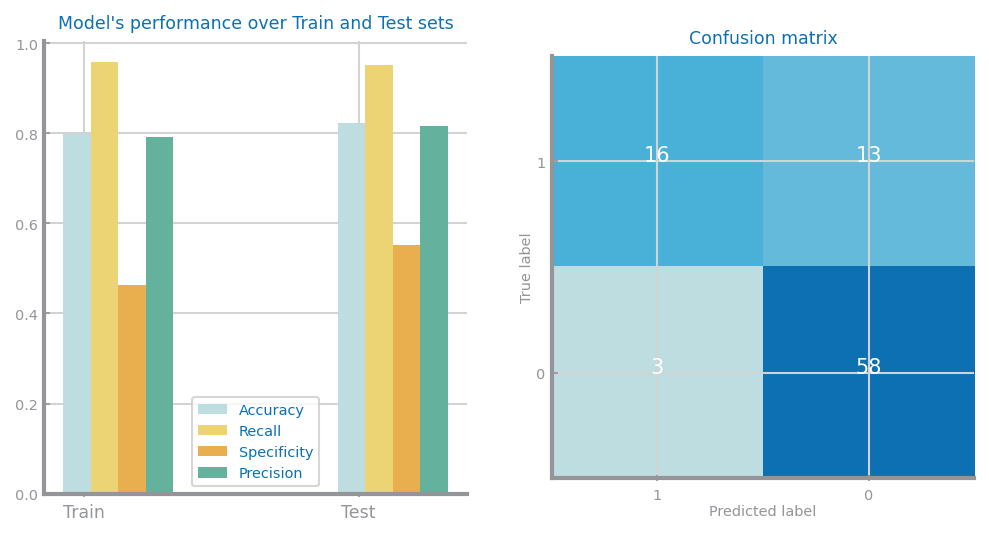

In [11]:
clf = knn = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)
print("An acc of {:.2f}%".format(metrics.accuracy_score(tstY, prd_tst)))

The results seem a lot better compared to before, the model now classifies some records as 1. It still wrongly classifies almost half of the positive ones as negative (1 as 0) so we still have a false negatives problem.

### Heart failure dataset (Normalized)
We will now test the Heart failure dataset normalized values

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../datasets/heart_failure_clinical_records_normalized.csv')

In [13]:
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels = pd.unique(y)

In [14]:
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

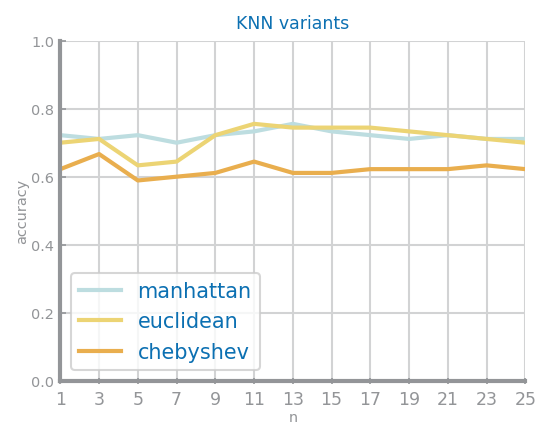

Best results with 13 neighbors and manhattan


In [15]:
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
best = (0, '')
last_best = 0
for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prdY = knn.predict(tstX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
        if yvalues[-1] > last_best:
            best = (n, d)
            last_best = yvalues[-1]
    values[d] = yvalues

plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

An acc of 0.76%


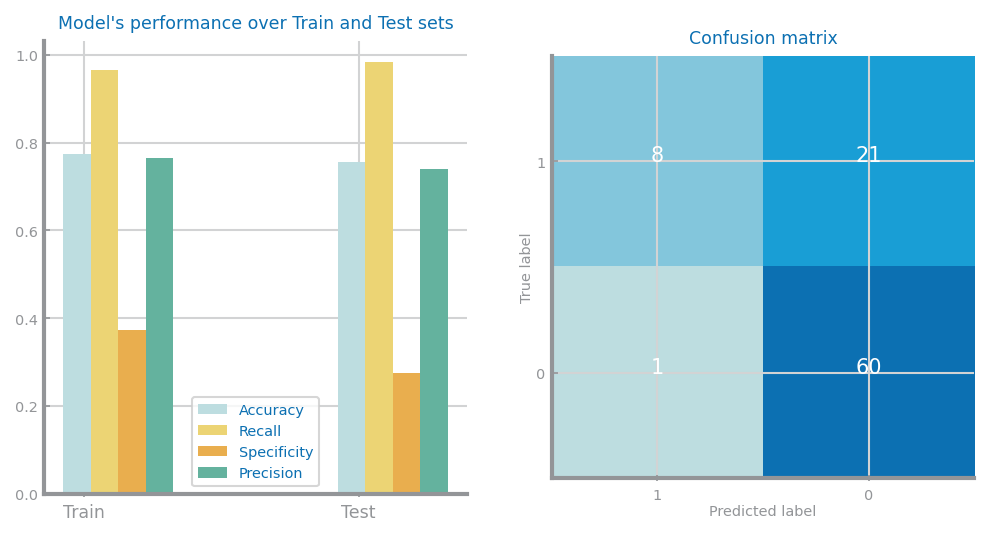

In [16]:
clf = knn = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)
print("An acc of {:.2f}%".format(metrics.accuracy_score(tstY, prd_tst)))

## Summary
### How do models improve with the increase of neighbors?

- On average the models do improve a bit with more neighbours but rapidly reach a palteu.

### How does performance changes with different distance measures?

- On the original data, they are about the same
- On the Standardized one, chebyshev has the best results most of the time, but it is the worse for the smaller Ks and about the same as the others for the bigger ones.
- On the Normalized one, chebyshev has the worst results while the other two are rather similar.

### What is the best parametrisation (number of neighbors and distance measure)?

- For the original and normalized data, no combination is good enough.
- On the Standardized data the best combination is 9 neighbors and chebyshev distance.

### Is the accuracy achieved good enough?

- None of the models would be used to be honest.

### What is the largest kind of errors?
- A lot of False Negtaives due to most of the models simply classifying almost all the data as 0.

### Is it possible to identify overfitting?
- Not really
